(array([3.0000e+00, 2.0000e+00, 1.5000e+01, 8.5000e+01, 3.2000e+02,
        1.1120e+03, 2.9570e+03, 6.0710e+03, 1.0601e+04, 1.5043e+04,
        1.7828e+04, 1.6918e+04, 1.3259e+04, 8.4180e+03, 4.5550e+03,
        1.8820e+03, 6.6500e+02, 1.9100e+02, 6.7000e+01, 8.0000e+00]),
 array([-2.85624582, -2.40517985, -1.95411389, -1.50304793, -1.05198197,
        -0.600916  , -0.14985004,  0.30121592,  0.75228189,  1.20334785,
         1.65441381,  2.10547977,  2.55654574,  3.0076117 ,  3.45867766,
         3.90974363,  4.36080959,  4.81187555,  5.26294151,  5.71400748,
         6.16507344]),
 <BarContainer object of 20 artists>)

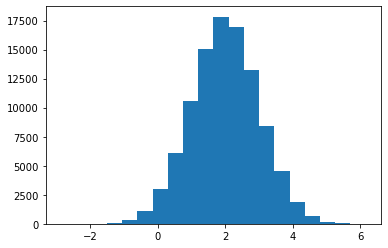

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

a = 2 + np.random.randn(100000)
b = 5 +  np.random.randn(100000)
 #superfie = a*b
s = a*b

plt.hist(a,bins=20)


(array([1.3000e+01, 5.2000e+01, 1.5700e+02, 5.4300e+02, 1.5070e+03,
        3.2920e+03, 6.5290e+03, 1.0545e+04, 1.4254e+04, 1.6371e+04,
        1.5837e+04, 1.2897e+04, 8.9110e+03, 5.1000e+03, 2.4950e+03,
        1.0170e+03, 3.4700e+02, 1.0300e+02, 2.2000e+01, 8.0000e+00]),
 array([0.92707578, 1.34259829, 1.75812079, 2.1736433 , 2.58916581,
        3.00468831, 3.42021082, 3.83573333, 4.25125583, 4.66677834,
        5.08230085, 5.49782335, 5.91334586, 6.32886837, 6.74439087,
        7.15991338, 7.57543589, 7.99095839, 8.4064809 , 8.82200341,
        9.23752591]),
 <BarContainer object of 20 artists>)

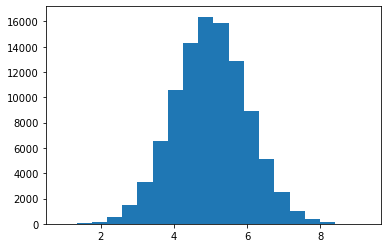

In [10]:

plt.hist(b,bins=20)


(array([1.5000e+01, 3.4200e+02, 4.9230e+03, 2.4381e+04, 3.7301e+04,
        2.3262e+04, 7.7410e+03, 1.7290e+03, 2.7000e+02, 3.6000e+01]),
 array([-13.68911641,  -8.53225082,  -3.37538524,   1.78148035,
          6.93834594,  12.09521152,  17.25207711,  22.40894269,
         27.56580828,  32.72267387,  37.87953945]),
 <BarContainer object of 10 artists>)

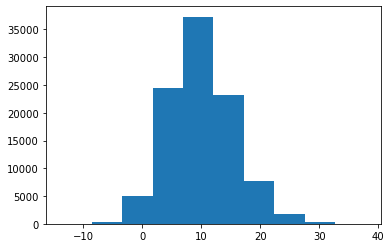

In [12]:
plt.hist(s)

In [13]:
#calculando la desviacion estandar de cada variable se tiene 
sigma_a = np.std(a,ddof=1)
sigma_b = np.std(b,ddof=1)
sigma_c = np.std(s,ddof=1)

In [16]:
print(sigma_a,sigma_b,sigma_c)

1.000968576277634 0.995530245949247 5.475029429415364


In [17]:
print("sigma s vale",sigma_c)

sigma s vale 5.475029429415364


In [20]:
sigma_s_formula = np.sqrt((np.mean(b)*sigma_a)**2+(np.mean(a)*sigma_b)**2)

In [22]:
print(sigma_s_formula)

5.388923410569979


In [24]:
#desviacion estandar de los coeficientes estimados , si repitieramos muchas veces el experieento

In [49]:
import numpy as np 
import matplotlib.pyplot as plt
datos = np.genfromtxt("ej-ajuste-04.txt")
x = datos[:,0]
y = datos[:,1]
Dy = datos[:,2]
print(x)
print(y)

[1. 2. 3. 4. 5. 6.]
[2.8 3.3 3.5 3.5 4.8 4.2]


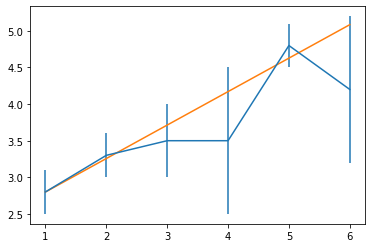

In [64]:
plt.errorbar(x,y,yerr=Dy)
a1,a0 = np.polyfit(x,y,1,w = 1/Dy)#sacanado los coeficientes de la recta
xx = np.linspace(1,6,100)
plt.plot(xx,a0+a1*xx)
#plt.plot(xx,yy)

In [95]:
 parametros, matriz = np.polyfit(x,y,1,w = 1/Dy,cov="unscaled")#ahora solo con polyfit se usa esto

In [96]:
#esto es la matriz de covarianza osea es algo asi como 
#(sigma**2 b1    algo     )
#( algo2         sigma**2 b0)
#entonces podemos ocupar esto de pofit para extrae losvalores de sigma 1 y sigma 2
sigmab1 = np.sqrt(matriz[0,0])
sigmab2 = np.sqrt(matriz[1,1])
print("sigma b1 vale ", sigmab1)
print("sigma b0 vale ",sigmab2)



sigma b1 vale  0.09590837054043413
sigma b0 vale  0.3138983593756243


In [97]:
print(parametros)

[0.45713123 2.34204248]


In [98]:
sigmab1 = np.sqrt(matriz[0,0])
sigmab0 = np.sqrt(matriz[1,1])

In [88]:
#np.polyfit(x,y,2,w = 1/Dy,cov="unscaled")#se puede hacer para polinomios 

(array([-0.00353013,  0.47950617,  2.31677709]),
 array([[ 0.00777611, -0.04928716,  0.05565418],
        [-0.04928716,  0.32159426, -0.37868402],
        [ 0.05565418, -0.37868402,  0.49685313]]))

In [99]:
#COMO LAS RAIS DEL VALOR DE LOS ELEMTOS EN LA DIAGNOLAS SON LOS SIGMAS SE PUEDE HACER ESTO
sigmas= np.sqrt(np.diagonal(matriz))
print(sigmas)
print(matriz)

[0.09590837 0.31389836]
[[ 0.00919842 -0.02593226]
 [-0.02593226  0.09853218]]


In [93]:
from scipy.optimize import curve_fit

In [101]:
def f(x,c1,c0):
    return c0+c1*x

curve_fit(f,x,y,sigma=Dy,absolute_sigma=True)



(array([0.45713123, 2.34204247]),
 array([[ 0.00919842, -0.02593226],
        [-0.02593226,  0.09853218]]))